In [2]:
install = False
if install:
    !pip3 install scikit-image
import numpy as np
import cv2 
import os 
import glob
import skimage
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt 

In [24]:
# HOG descriptor for the image. A 1D (flattened) array is returned
def hog_feature(image):
    hogD = skimage.feature.hog(image, visualize = False, feature_vector= True, channel_axis = None)
    return np.array(hogD)

def hog_visualise_only(tree_im, name = "Input Image"):
    hogD, hog_image = skimage.feature.hog(tree_im, visualize = True, feature_vector= True, channel_axis = None)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(tree_im, cmap=plt.cm.gray)
    ax1.set_title(f'{name}')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 100))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('HOG Visualisation')
    plt.show()


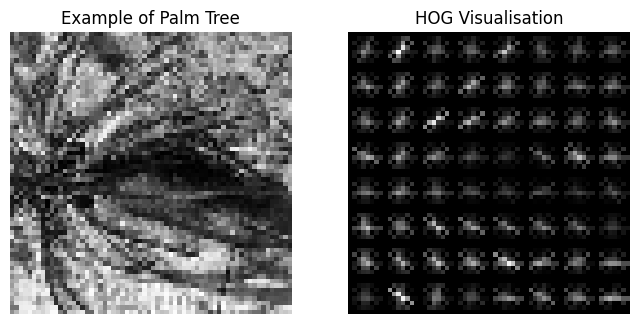

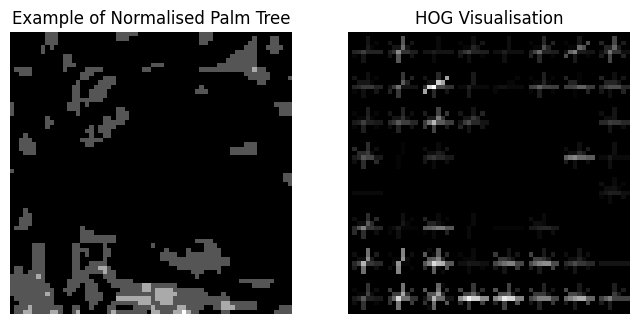

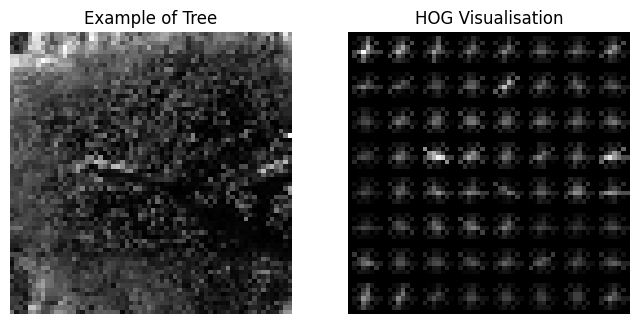

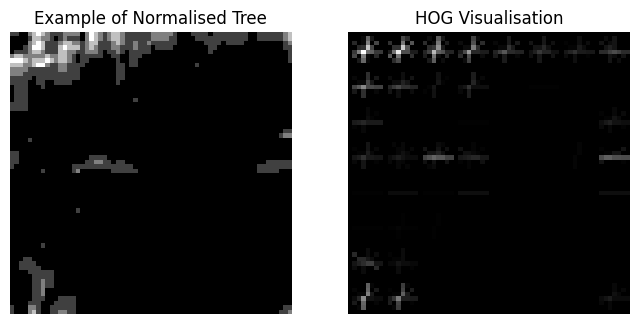

In [25]:
test = True 
if test:
    image = cv2.imread("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/ck2euxc9kxgvm07486g2d5pid_0_2492_267_2848_Palm.jpg", flags = cv2.IMREAD_GRAYSCALE)
    imageN =cv2.imread("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/norm/ck2euxc9kxgvm07486g2d5pid_0_2492_267_2848_Palm.jpg", flags = cv2.IMREAD_GRAYSCALE)

    tree_im = cv2.imread("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/ck2euxc9kxgvm07486g2d5pid_33_1251_339_1622_Tree.jpg", flags = cv2.IMREAD_GRAYSCALE)
    tree_imN = cv2.imread("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/norm/ck2euxc9kxgvm07486g2d5pid_33_1251_339_1622_Tree.jpg", flags = cv2.IMREAD_GRAYSCALE)

    
    hog_visualise_only(image, "Example of Palm Tree")
    hog_visualise_only(imageN, "Example of Normalised Palm Tree")
    hog_visualise_only(tree_im, "Example of Tree")
    hog_visualise_only(tree_imN, "Example of Normalised Tree")
    # t = hog_feature(image)
    # print(t)
    # print(type(t))
    # hog_visualise_only(imageN)
    # hog_visualise_only(tree_im)
    # hog_visualise_only(tree_imN)


In [7]:
# Store all the feature vectors into dictionary
# takes in the directory of the single trees 
# returns a dictionary of hog features 
def extractHog(srcDir):
    
    hog_dict = {}
    im_paths = glob.glob(srcDir+"*.j*" )
    len_dir = len(srcDir)
    # print(len_dir)
    
    # for each tree extract hog feature 
    for im_path in im_paths:
        
        image = cv2.imread(im_path, flags = cv2.IMREAD_GRAYSCALE)
            
        # find name of corresponding image (watch out if file name has a .j in other places)
        dot_index = im_path.find(".j")
        im_name = im_path[len_dir:dot_index]
        # print(im_name)
        np_hog = hog_feature(image)
        # print(np_hog)
        hog_dict[im_name] = np_hog

    
    return hog_dict


In [8]:
generateFeatures = False
if generateFeatures:
    hog_dict_test = extractHog("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/")
    print(len(hog_dict_test))
    hog_dict_testN = extractHog("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/test/norm/")

    hog_dict_train = extractHog("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/train/")
    print(len(hog_dict_train))
    hog_dict_trainN = extractHog("/Users/catherineli/Library/CloudStorage/OneDrive-UniversityofCapeTown/2.CSC2005Z/code-related/singleTree/train/norm/")
    
    np.save('hog_test.npy', hog_dict_test)
    np.save('hog_testN.npy', hog_dict_testN)
    
    np.save('hog_train.npy', hog_dict_train)
    np.save('hog_trainN.npy', hog_dict_trainN)



In [9]:
print(hog_dict_test["ck2euxc9kxgvm07486g2d5pid_0_2492_267_2848_Palm"].shape)
print(hog_dict_test["ck2euxc9kxgvm07486g2d5pid_0_2492_267_2848_Palm"].size)

NameError: name 'hog_dict_test' is not defined